<a href="https://colab.research.google.com/github/wnoyan/Machine-Learning/blob/master/Result%20Prediction%20from%20Custome%20Dataset%20using%20Decision%20Tree%20and%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Result Prediction using DT

## Loading Required Libraries

In [ ]:
# Loading Required Libraries

import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

## Mounting Google Drive

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Study Information Dataset from Google Drive

In [ ]:
# Loading Dataset
study_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSE4112 - ML Lab/Grade Prediction Data (Responses) - Form Responses 1.csv", encoding='utf8', engine='python')

# Exploring Dataset
study_data.head()

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),GPA
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


## Handling NULL Data

In [ ]:
# Checking for NULL Data
study_data.isnull()

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),GPA
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
83,False,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Filling Missing Value Using 'fillna()'
#study_data.fillna(0)

# Droping Rows That Have NaN values
study_data = study_data.dropna()

# Getting Information About Study Dataset
study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1 to 87
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Daily Study Hour (0 - )                    87 non-null     int64  
 1   Average CT Marks (0 - 20)                  87 non-null     int64  
 2   Class Attendance (percentage)              87 non-null     int64  
 3   PL/SPL Study Hours (Daily) (0 - )          87 non-null     int64  
 4   PL/SPL Sleeping Hours (Daily Average)      87 non-null     int64  
 5   Average Sleeping Hours (Daily)             87 non-null     float64
 6   Social Media Hours (Daily Average)         87 non-null     int64  
 7   PL/SPL Social Media Hours (Daily Average)  87 non-null     int64  
 8   Concentration in Classes (0 - 10)          87 non-null     float64
 9   Confidence (0 - 10)                        87 non-null     int64  
 10  GPA                         

## Feature Selection

In [ ]:
# Renaming Columns
study_data = study_data.rename(columns = {'Daily Study Hour (0 - )': 'DStudyHour',
                                          'Average CT Marks (0 - 20)': 'AvgCTMark',
                                          'Class Attendance (percentage)': 'ClassAttendance',
                                          'PL/SPL Study Hours (Daily) (0 - )': 'PSStudyHour',
                                          'PL/SPL Sleeping Hours (Daily Average)': 'PSSleepingHour',
                                          'Average Sleeping Hours (Daily)': 'AvgSleepingHour',
                                          'Social Media Hours (Daily Average)': 'DSocialMediaHour',
                                          'PL/SPL Social Media Hours (Daily Average)': 'PSSocialMediaHour',
                                          'Concentration in Classes (0 - 10)': 'Concentration',
                                          'Confidence (0 - 10)': 'Confidence'})

# Feature Selection
feature_columns = ['DStudyHour', 'AvgCTMark', 'ClassAttendance', 'PSStudyHour', 'PSSleepingHour', 'AvgSleepingHour', 'DSocialMediaHour', 'PSSocialMediaHour', 'Concentration', 'Confidence']

X = study_data[feature_columns].values.tolist()
y = study_data.GPA.values.tolist()

print(X[0:5])
print(y[0:5])

[[2.0, 12.0, 95.0, 9.0, 10.0, 10.0, 2.0, 1.0, 7.0, 7.0], [2.0, 15.0, 96.0, 13.0, 6.0, 8.0, 5.0, 2.0, 5.0, 8.0], [1.0, 9.0, 70.0, 6.0, 8.0, 8.0, 3.0, 2.0, 7.0, 9.0], [1.0, 8.0, 60.0, 10.0, 9.0, 8.0, 2.0, 2.0, 3.0, 4.0], [2.0, 15.0, 80.0, 10.0, 5.0, 7.0, 1.0, 0.0, 7.0, 9.0]]
[3.84, 3.61, 3.41, 3.14, 3.88]


## Categorization of Target Classes

In [ ]:
# Categorization of GPA

for i in range(len(y)):
  if y[i] >= 3.75:
    y[i] = 'Outstanding'
  elif y[i] >= 3.5:
    y[i] = 'Excellent'
  elif y[i] >= 3.25:
    y[i] = 'Very Good'
  elif y[i] >= 3.0:
    y[i] = 'Good'
  elif y[i] >= 2.75:
    y[i] = 'Poor'
  elif y[i] >= 2.5:
    y[i] = 'Very Poor'
  else:
    y[i]= 'Fail'

print(y[0:5])

['Outstanding', 'Excellent', 'Very Good', 'Good', 'Outstanding']


## Splitting Dataset into Training and Testing Sets

In [ ]:
# Splitting the Dataset into Training and Testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Checking existance of NaN Values in Train and Test Sets

In [ ]:
# Checking existance of NaN Values in Train and Test Sets

print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))

False
False
False
False


## Building Decision Tree Classifier

In [ ]:
# Decision Tree Classifier 
DT = DecisionTreeClassifier(criterion='entropy')

# Training the Classifier
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Prediction

In [ ]:
# Prediction on X_test (Testing Data)
Y_pred = DT.predict(X_test)
print(Y_pred)

['Good' 'Very Good' 'Poor' 'Good' 'Outstanding' 'Poor' 'Outstanding'
 'Outstanding' 'Outstanding' 'Good' 'Outstanding' 'Excellent'
 'Outstanding' 'Good' 'Very Good' 'Good' 'Outstanding' 'Outstanding']


##Getting Accuracy && Confusion Matrix 

In [ ]:
# Accuray of the Model 
print("Accuracy:", round(accuracy_score(y_test, Y_pred)*100), "%")

Accuracy: 56 %


## Graphical View of Decision Tree

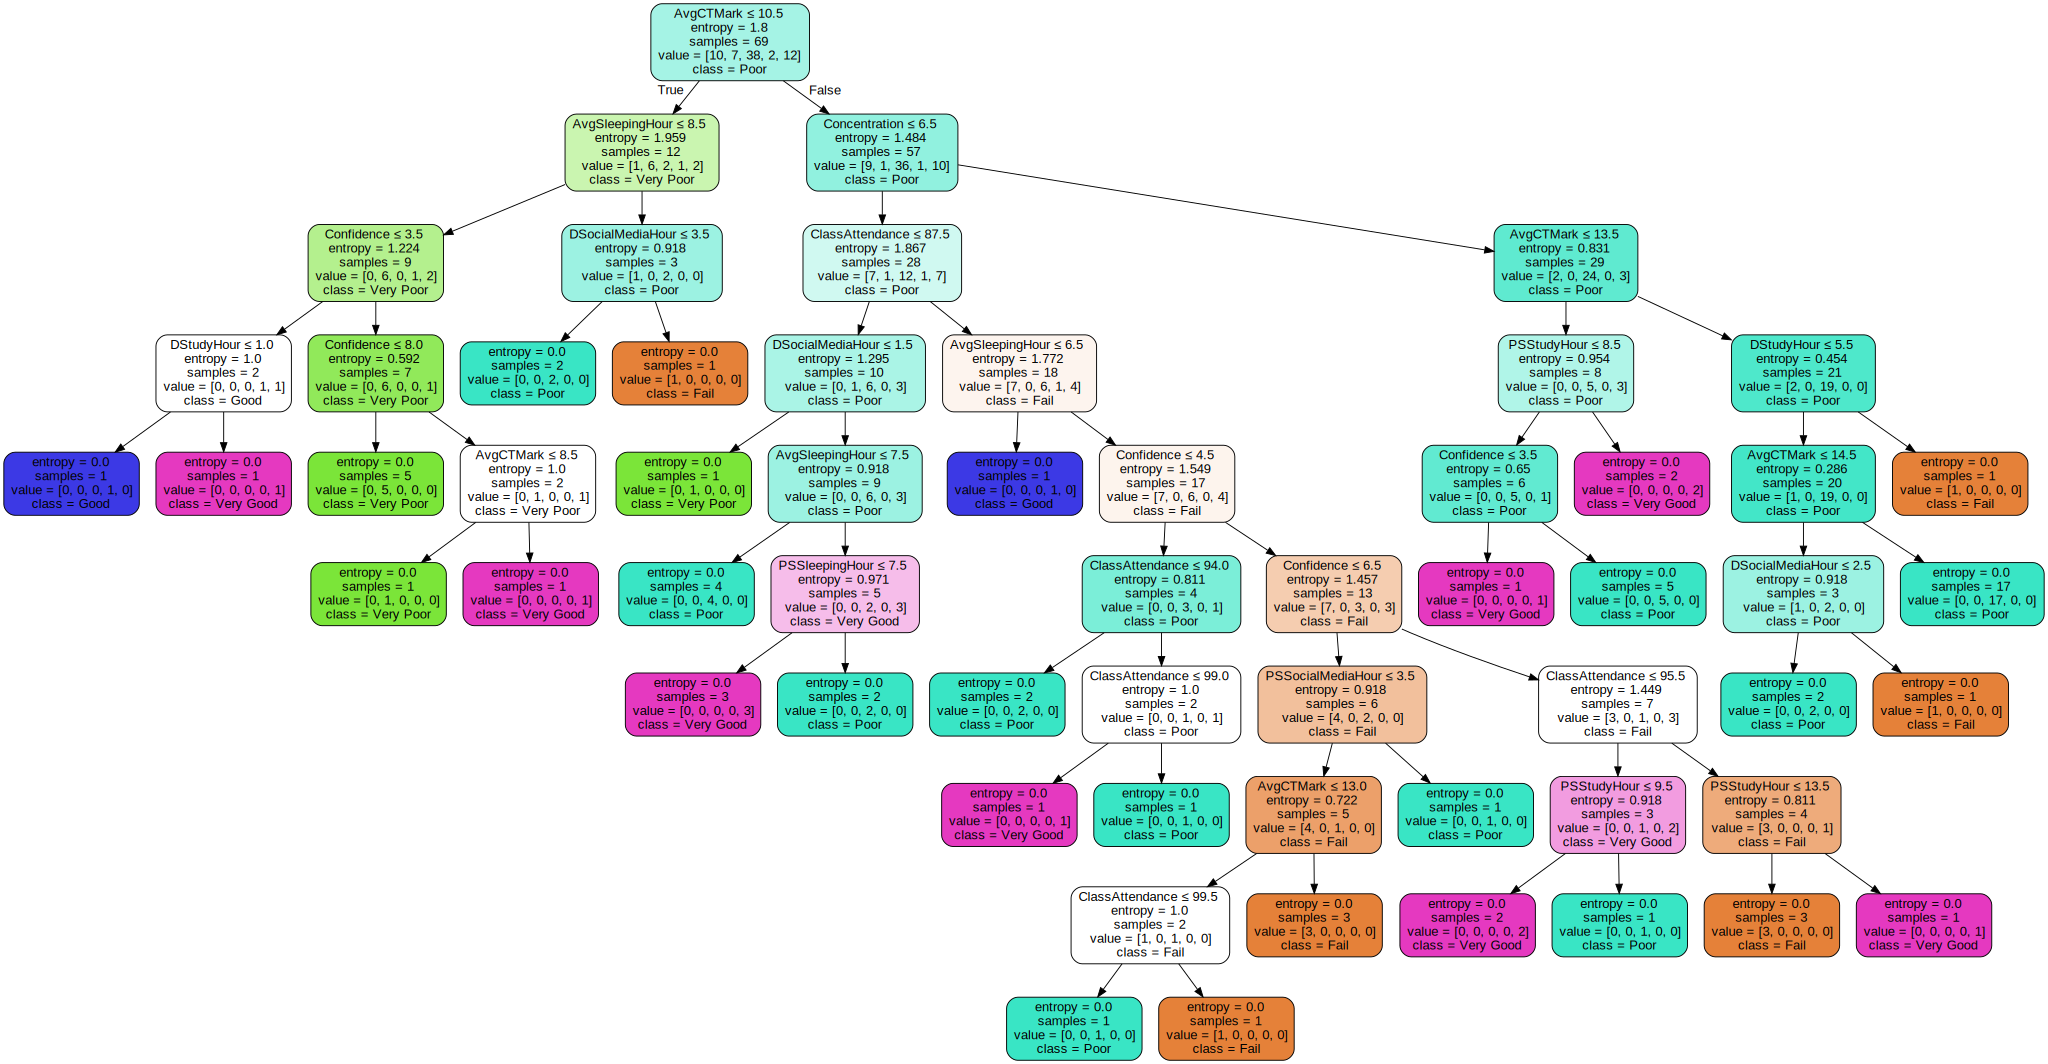

In [ ]:
# Graphical View of Decision Tree

import graphviz 

dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=feature_columns,  
                      class_names=['Fail', 'Very Poor', 'Poor', 'Good', 'Very Good', 'Excellent', 'Outstanding'],  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  

graph 

## Hyper Parameter Tuning for Decision Tree

In [ ]:
# Decision Tree Classifier 

dt = DecisionTreeClassifier()

In [ ]:
# Model Parameters
from sklearn.model_selection import GridSearchCV

param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf": range(1, 5)
}

In [ ]:
#dictp = {'i': 0, 'accuracy': 0}

#for i in range(101):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

grid = GridSearchCV(dt, param_grid=param_dict, cv=10, verbose = 1, n_jobs=-1)

grid.fit(X_train, y_train)

#print(grid.best_params_) 
#print(grid.best_estimator_)

grid_predictions = grid.predict(X_test) 

#print(classification_report(y_test, grid_predictions)) 

acu = accuracy_score(y_test, grid_predictions) * 100

#   if dictp['accuracy'] < acu:
#       dictp['accuracy'] = acu
#       dictp['i'] = i

#print("i : ", dictp['i'], " accuracy : ", dictp['accuracy'])

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  F

In [ ]:
# Best Model's Report

from sklearn.metrics import classification_report, confusion_matrix 

print(grid.best_params_) 

print(classification_report(y_test, grid_predictions))

#print("i : ", dictp['i'], " accuracy : ", dictp['accuracy'])

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         1
        Good       0.00      0.00      0.00         0
 Outstanding       0.81      0.93      0.87        14
   Very Good       0.00      0.00      0.00         3

    accuracy                           0.72        18
   macro avg       0.20      0.23      0.22        18
weighted avg       0.63      0.72      0.67        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

## Result Prediction using KNN

## Dataset Scaling

In [ ]:
# Dataset Scaling

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Getting Accuracy List for Varing Value of K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy_list = np.zeros(20)

for i in range(1, 21):  
    KNN = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)

    y_pred = KNN.predict(X_test)
    
    accuracy_list[i-1] = metrics.accuracy_score(y_test, y_pred)

print(accuracy_list)

[0.44444444 0.33333333 0.38888889 0.44444444 0.44444444 0.5
 0.5        0.55555556 0.66666667 0.77777778 0.72222222 0.72222222
 0.66666667 0.72222222 0.72222222 0.72222222 0.77777778 0.77777778
 0.77777778 0.77777778]


## Accuracy VS Number of Neighbors Graph

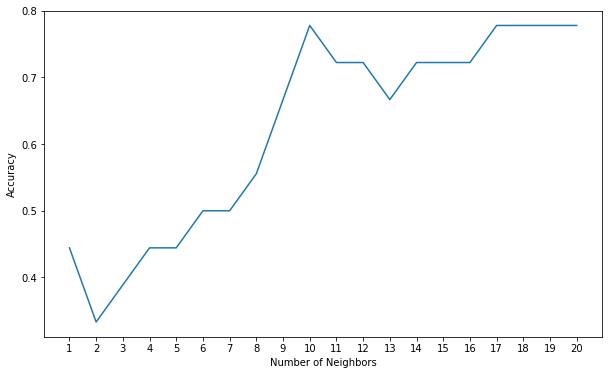

In [ ]:
xticks_mark = np.arange(1, 21, step=1.0)

plt.figure(figsize = (10, 6))

plt.plot(range(1, 21), accuracy_list)

plt.xticks(xticks_mark)

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

## Errors Calculation for Different K Values

In [ ]:
# Calculating Errors for K Values Between 1 and 40

error = []
for i in range(1, 40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.5555555555555556
0.6666666666666666
0.6111111111111112
0.5555555555555556
0.5555555555555556
0.5
0.5
0.4444444444444444
0.3333333333333333
0.2222222222222222
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.2777777777777778
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222


## Errors Plotting for Different K Values

Text(0, 0.5, 'Errors')

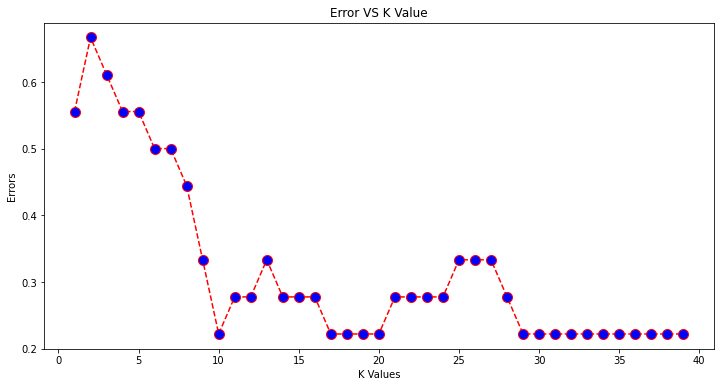

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title('Error VS K Value')

plt.xlabel('K Values')
plt.ylabel('Errors')

## Getting Hyperparameters with the Best Score

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : np.arange(1, 21, step=1),
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs = -1)

# Fit the Model on Our Train Set
g_res = gs.fit(X_train, y_train)

# Hyperparameters with the Best Score
print(g_res.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}


## Forming Best Model for this Dataset

In [ ]:
# Forming Best Model for this Dataset

KNN = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm = 'brute', metric = 'minkowski')
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')

## Prediction

In [ ]:
# Prediction
y_pred = KNN.predict(X_test)

## Best Accuracy

In [ ]:
print('Testing Accuracy: ', round(metrics.accuracy_score(y_test, y_pred) * 100), '%')

Testing Accuracy:  78 %
